# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

In [2]:
X_train = pd.read_csv('./X_train.csv')
X_test = pd.read_csv('./X_test.csv')
y_train = pd.read_csv('./UCI HAR Dataset/train/y_train.txt', header=None, delim_whitespace=True)
y_test = pd.read_csv('./UCI HAR Dataset/test/y_test.txt', header=None, delim_whitespace=True)

In [3]:
X_train.set_index(['subject', X_train.index], inplace=True)
X_test.set_index(['subject', X_test.index], inplace=True)

### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [4]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.25, random_state=77)

In [5]:
X_train.size

3098868

In [6]:
X_valid.size

1032956

In [7]:
X_test.size

1656214

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [8]:
clf = DecisionTreeClassifier(random_state=77, max_depth=4).fit(X_train, y_train)

In [9]:
#extraindo o nome das colunas
feature_names = X_train.columns
# achando os mais importantes
importance_sorted = sorted(zip(clf.feature_importances_, feature_names), reverse=True)


In [10]:
importance_sorted

[(0.28778158908493406, 'tGravityAcc-min()-X'),
 (0.25340389311656114, 'fBodyAcc-mean()-X'),
 (0.16051420205774705, 'tGravityAcc-mean()-Y'),
 (0.13745019632798058, 'fBodyAccMag-energy()'),
 (0.12271599279334063, 'tGravityAcc-arCoeff()-Y,1'),
 (0.019372595176029215, 'tBodyGyro-correlation()-Y,Z'),
 (0.012887490375758372, 'tGravityAcc-energy()-Y'),
 (0.005874041067648971, 'fBodyGyro-std()-X'),
 (0.0, 'tGravityAccMag-std()'),
 (0.0, 'tGravityAccMag-sma()'),
 (0.0, 'tGravityAccMag-min()'),
 (0.0, 'tGravityAccMag-mean()'),
 (0.0, 'tGravityAccMag-max()'),
 (0.0, 'tGravityAccMag-mad()'),
 (0.0, 'tGravityAccMag-iqr()'),
 (0.0, 'tGravityAccMag-entropy()'),
 (0.0, 'tGravityAccMag-energy()'),
 (0.0, 'tGravityAccMag-arCoeff()4'),
 (0.0, 'tGravityAccMag-arCoeff()3'),
 (0.0, 'tGravityAccMag-arCoeff()2'),
 (0.0, 'tGravityAccMag-arCoeff()1'),
 (0.0, 'tGravityAcc-std()-Z'),
 (0.0, 'tGravityAcc-std()-Y'),
 (0.0, 'tGravityAcc-std()-X'),
 (0.0, 'tGravityAcc-sma()'),
 (0.0, 'tGravityAcc-min()-Z'),
 (0.0, 't

### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [11]:
X_train1=X_train[['tGravityAcc-min()-X','tBodyAcc-mean()-Y','tGravityAcc-mean()-Y']]
X_test1=X_test[['tGravityAcc-min()-X','tBodyAcc-mean()-Y','tGravityAcc-mean()-Y']]
X_valid1=X_valid[['tGravityAcc-min()-X','tBodyAcc-mean()-Y','tGravityAcc-mean()-Y']]

In [12]:
clf = DecisionTreeClassifier(random_state=47, max_depth=4).fit(X_train1, y_train)

In [13]:
path = clf.cost_complexity_pruning_path(X_train1, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [14]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=47, ccp_alpha=ccp_alpha).fit(X_train1, y_train)
    clfs.append(clf)

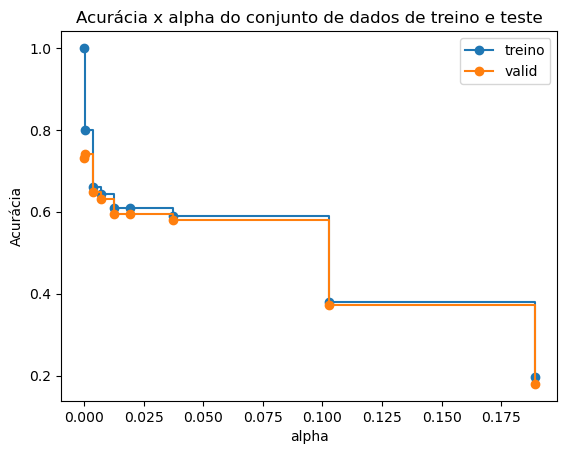

In [15]:
train_scores = [clf.score(X_train1, y_train) for clf in clfs]
test_scores  = [clf.score(X_valid1, y_valid)   for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas, train_scores, marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="valid",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [16]:
ind_melhor_arvore = len(test_scores) - test_scores[::-1].index(max(test_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]
melhor_arvore

DecisionTreeClassifier(ccp_alpha=0.0006495559684357877, random_state=47)

In [17]:
melhor_arvore = DecisionTreeClassifier(random_state=47, ccp_alpha =0.0002891191328528699, max_depth=4 ).fit(X_train1, y_train)

### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

In [18]:
melhor_arvore.score(X_train1, y_train)

0.6320275661951397

In [19]:
melhor_arvore.score(X_test1, y_test)

0.5242619613165932

In [20]:
melhor_arvore.score(X_valid1, y_valid)

0.6131664853101197

Acurácia: 52.43


C:\Users\eric_\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


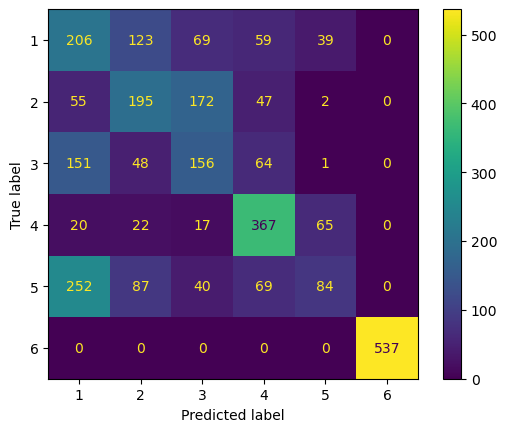

In [21]:
acuracia_teste = melhor_arvore.score(X_test1, y_test)

print(f'Acurácia: {acuracia_teste*100:.2f}')
plot_confusion_matrix(melhor_arvore, X_test1, y_test);